# A minimal example of the inference algorithm

The notebook loads trajectories generated from a dEPR mobility model for the area of Berlin.

Among all trajectories, a sample of 4 individuals is chosen.

On those trajectories the outbreak detection inference algorithm is applied, which identifies locations of co-location among the individuals.

As the individuals are chosen randomly it is not to be expected that a good candidate exists. In the below example, there was actually a co-location of two individuals, which is correctly identified by the algorithm.

   loc_id        lat        lon     score                time
0       0  52.504450  13.332550  0.496184 1970-01-04 15:30:00
1       1  52.503450  13.333450  0.495709 1970-01-04 14:37:30
2       2  52.495187  13.326743  0.362114 1970-01-04 11:00:00
3       3  52.494613  13.326457  0.362114 1970-01-04 11:00:00
4       4  52.505039  13.339860  0.253721 1970-01-04 13:15:00


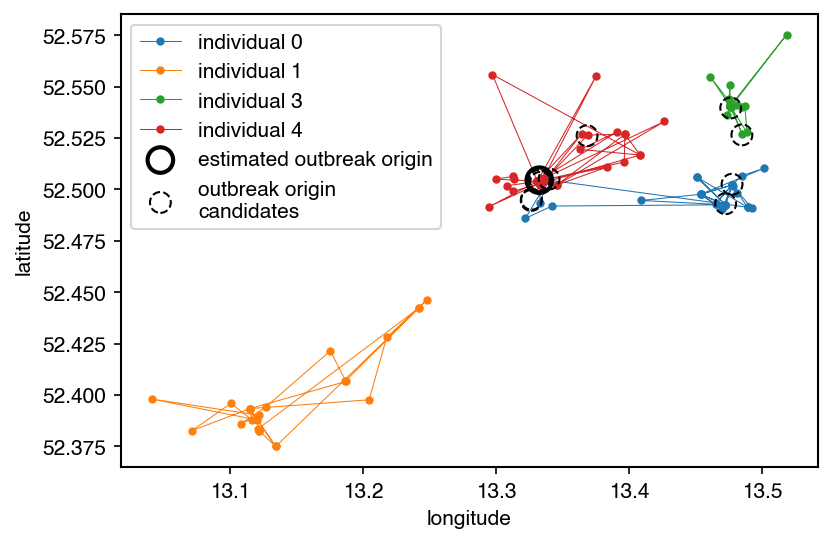

In [2]:
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

# Load simulated trajectories of 1000 individuals
traj = pd.read_csv('../data/sample_trajectories_N1000.csv')

# Prepare a sample of trajectories of 4 individuals
sample_individuals = [0,1,3,4]
sample_trajectories = traj.loc[traj['ind'].isin(sample_individuals)]
sample_trajectories = sample_trajectories.loc[sample_trajectories['t'] < 100] # Limit time

# Load inference method
from outbreak import Inference
inference = Inference(GAUSS_SIGMA=1)

# Run inference on sample
origins = inference.find_outbreak_origins(sample_trajectories)
print(origins.head())

# Plot results
from outbreak.util import plot_result
plot_result(sample_trajectories, origins, n_origins=10)
plt.savefig("../data/minimal_example.png", dpi=100)